# Домашня робота №7

# Перетворення випадкових величин

In [300]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, geom, expon

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

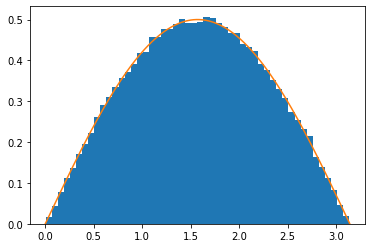

In [301]:
x = np.arange(0, np.pi, 0.01)
plt.hist(np.arccos(1 - 2*uniform(0, 1).rvs(100000)), bins=50, density=True)
plt.plot(x, np.sin(x)/2)

plt.show()

### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

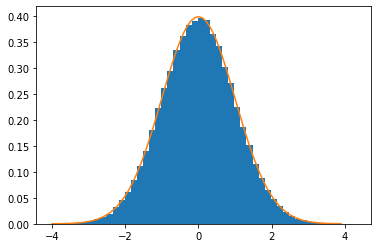

In [302]:
x = np.arange(-4, 4, 0.1)
plt.hist(norm.ppf(uniform(0, 1).rvs(100000)), bins=50, density=True)
plt.plot(x, norm.pdf(x))

plt.show()

## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

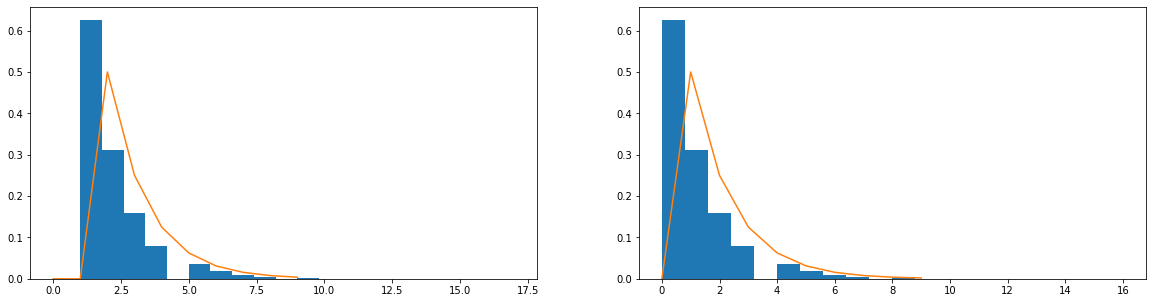

In [303]:
x = geom(0.5).rvs(10000)
x_ = np.arange(0, 10)
e = x - 1
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.hist(x, bins=20, density=True)
plt.plot(x_, geom(0.5, loc=1).pmf(x_))

plt.subplot(122)
plt.hist(e, bins=20, density=True)
plt.plot(x_, geom(0.5).pmf(x_))

plt.show()

## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

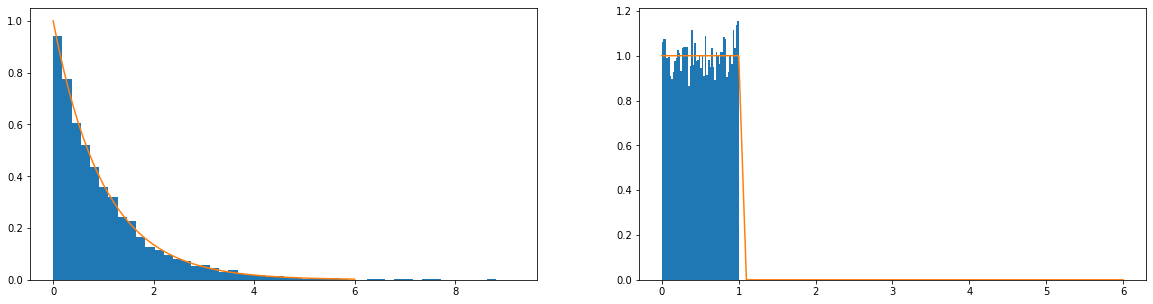

In [304]:
x = expon.rvs(size=10000)
x_ = np.arange(0, 6.1, 0.1)
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.hist(x, bins=50, density=True)
plt.plot(x_, expon.pdf(x_))

plt.subplot(122)
plt.hist(expon.pdf(x), bins=50, density=True,)
plt.plot(x_, uniform.pdf(x_))

plt.show()

### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

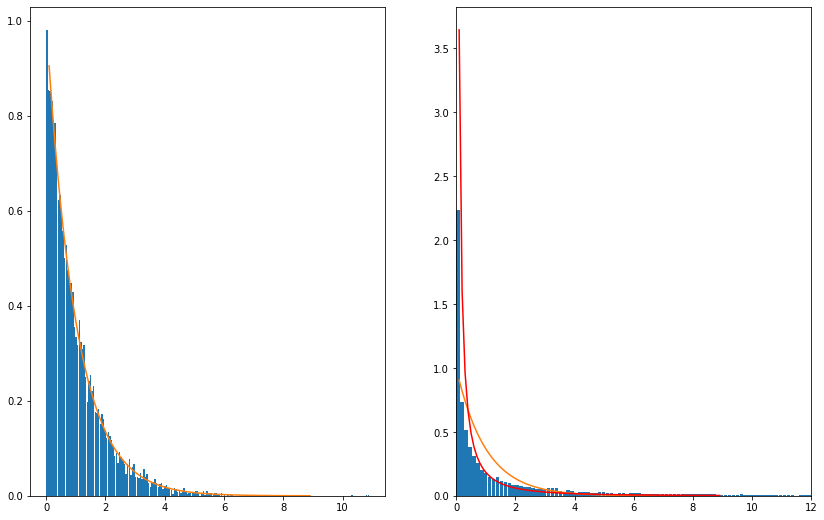

In [305]:
k = expon()
x = np.arange(0.1, 9, 0.1)
fig, axs = plt.subplots(1, 2, figsize=(14, 9))
rvs = k.rvs(10000)**2
e = lambda x: np.exp(-np.sqrt(x))/(2*x)

axs[0].hist(k.rvs(10000), bins=200, rwidth=0.9, density=True)
axs[0].plot(x, k.pdf(x))
axs[1].set_xlim([0, 12])
axs[1].hist(rvs, bins=600, rwidth=0.9, density=True)
axs[1].plot(x, k.pdf(x))
axs[1].plot(x, e(x), 'r')

plt.show()

## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

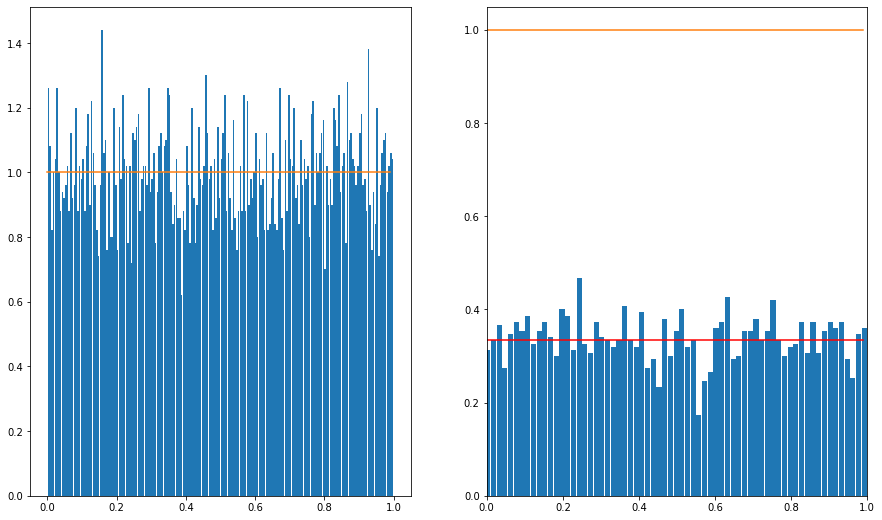

In [306]:
k = uniform(0,1)
x = np.arange(0, 1, 0.01)
fig, axs = plt.subplots(1, 2, figsize=(15, 9))
rvs = k.rvs(10000)*3 - 2
e = lambda x: 1/3

axs[0].hist(k.rvs(10000), bins=200, rwidth=0.9, density=True)
axs[0].plot(x, k.pdf(x))
axs[1].set_xlim([0, 1])
axs[1].hist(rvs, bins=200, rwidth=0.9, density=True)
axs[1].plot(x, k.pdf(x))
axs[1].plot(x, list(map(e, x)), 'r')

plt.show()

### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

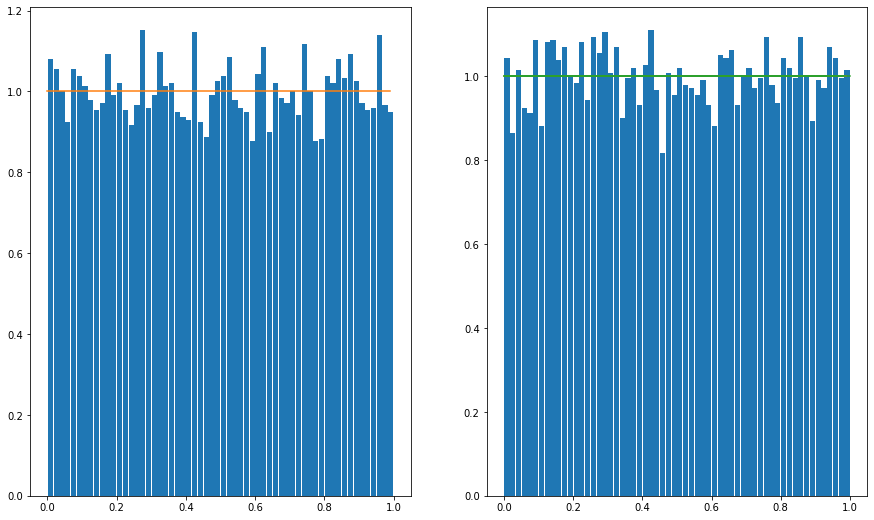

In [307]:
k = uniform(0,1)
x = np.arange(0, 1, 0.01)
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].hist(k.rvs(10000), bins=60, rwidth=0.9, density=True)
axs[0].plot(x, k.pdf(x))
axs[1].hist(np.abs(k.rvs(10000)*2 - 1), bins=60, rwidth=0.9, density=True)
axs[1].plot(x, k.pdf(x))
axs[1].plot(np.abs(2*x - 1), k.pdf((x + 1)/2) + k.pdf(-(x + 1)/2))

plt.show()

### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

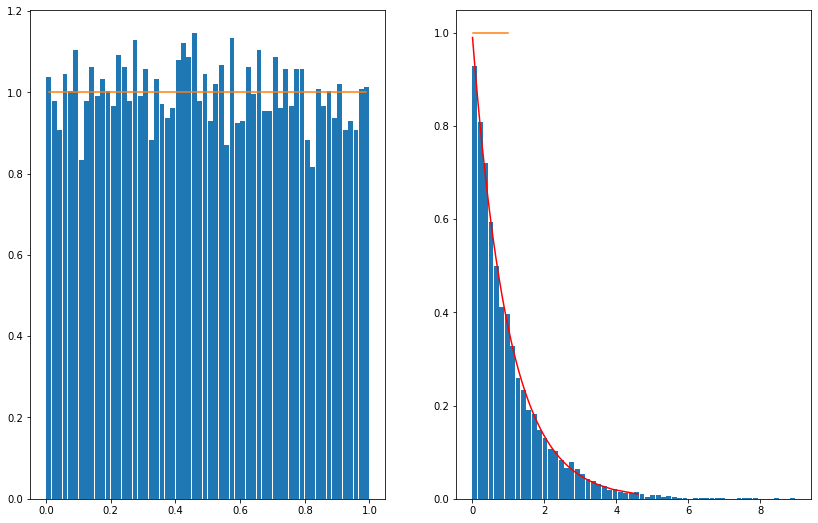

In [308]:
k = uniform(0,1)
x = np.arange(0.01, 1, 0.01)
fig, axs = plt.subplots(1, 2, figsize=(14, 9))

axs[0].hist(k.rvs(10000), bins=60, rwidth=0.9, density=True)
axs[0].plot(x, k.pdf(x))
axs[1].hist(np.abs(-np.log(k.rvs(10000))), bins=60, rwidth=0.9, density=True)
axs[1].plot(x, k.pdf(x))
axs[1].plot(-np.log(x), x*k.pdf(np.exp(-x)), 'r')

plt.show()

## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [309]:
k = (uniform(0, 1), uniform(0, 1))

Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

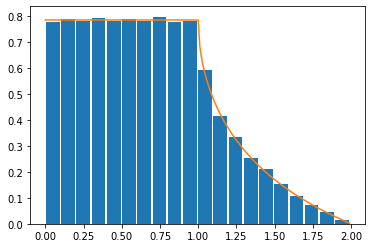

In [310]:
def func(x):
    res = np.pi/4 if 0 <= x <= 1 else 0
    res += (np.pi/4 - np.arccos(1/np.sqrt(x)) + 1/(2 * np.sqrt(x - 1))) if 1 < x <= 2 else 0
    res -= 1/(2 * np.sqrt(x - 1)) if 1 < x <= 2 else 0
    return res


random = uniform(0, 1).rvs(100000)**2 + uniform(0, 1).rvs(100000)**2
x = np.arange(0, 2, 0.01)

plt.hist(random, bins=20, rwidth=0.9, density=True,)
plt.plot(x, list(map(func, x)))

plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

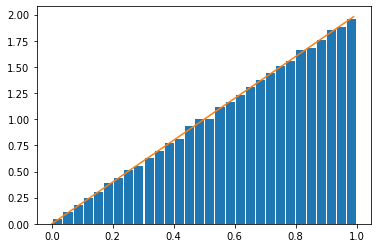

In [311]:
k = uniform(0,1)
random = np.array([max(a, b) for a, b in zip(k.rvs(100000), k.rvs(100000))])
x = np.arange(0, 1, 0.01)

plt.hist(random, bins=30, rwidth=0.9, density=True)
plt.plot(x, x*2)

plt.show()

Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

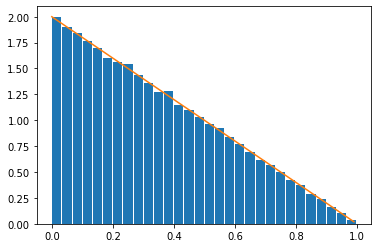

In [312]:
k = uniform(0,1)
random = np.array([abs(a - b) for a, b in zip(k.rvs(100000), k.rvs(100_000))])
x = np.arange(0, 1, 0.01)

plt.hist(random, bins=30, rwidth=0.9, density=True)
plt.plot(x, 2 - x*2)

plt.show()